# IF3270 Machine Learning | Tugas Besar

This notebook serves as a testbed for the FFNN implementation from scratch. We will analyze the effects of various hyperparameters, including depth (number of layers), width (number of neurons per layer), activation function, learning rate, and weight initialization. Additionally, we will compare the performance of the custom FFNN model with the scikit-learn MLP.

Group Number: XX

Group Members:
- Adril Putra Merin (13522068)
- Marvin Scifo Y. Hutahean (13522110)
- Berto Richardo Togatorop (13522118)

## 1. Import Libraries

In [1]:
from ffnn import FFNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, log_loss, accuracy_score, recall_score, precision_score, confusion_matrix, classification_report

## 2. Import Dataset

In [2]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [3]:
y = y.astype(np.int32)

In [4]:
print(X.shape)

(70000, 784)


In [5]:
print(y.shape)

(70000,)


In [6]:
print(np.unique(y))
print(f"Number of class: {len(np.unique(y))}")

[0 1 2 3 4 5 6 7 8 9]
Number of class: 10


In [7]:
freq = [0 for i in range(10)]
for i in range(len(y)):
    freq[y[i]] += 1

for i in range(10):
    print(f"Class {i}: {freq[i]}")

Class 0: 6903
Class 1: 7877
Class 2: 6990
Class 3: 7141
Class 4: 6824
Class 5: 6313
Class 6: 6876
Class 7: 7293
Class 8: 6825
Class 9: 6958


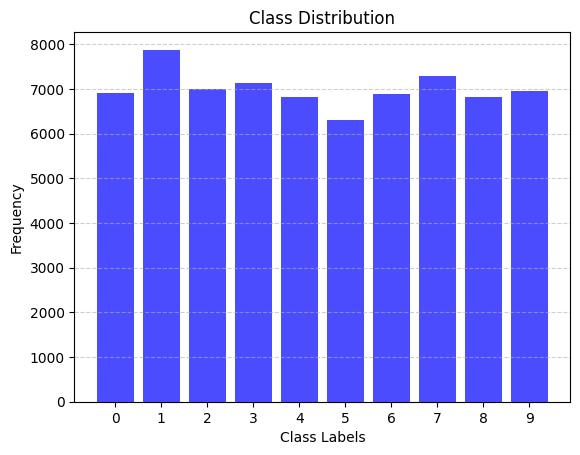

In [8]:
plt.bar(range(10), freq, color='blue', alpha=0.7)
plt.xlabel("Class Labels")
plt.ylabel("Frequency")
plt.title("Class Distribution")
plt.xticks(range(10))
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

Based on the graph above, the dataset is pretty balanced. Therefore, we will use micro average for the evaluation metric.

## 3. Split Training Set and Validation Set

In [9]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 4. Hyperparameters Experiment

### A. Effect of Depth and Width

In this section, we explore the impact of depth and width on the FFNN’s performance.

- Depth (Number of Hidden Layers): We test models with 3, 4, and 5 hidden layers to analyze how increasing the number of layers affects learning and generalization.

- Width (Number of Neurons per Layer): We vary the number of neurons per layer with values of 16, 32, and 64 to observe how the capacity of each layer influences model performance.

#### Width Variation

In [10]:
width_variations = [
    [784, 16, 16, 16, 10], # depth = 3, width = 16
    [784, 32, 32, 32, 10], # depth = 3, width = 32
    [784, 64, 64, 64, 10],  # depth = 3, width = 64
]

history_width =  {}
cnt = 0
for config in width_variations:
    ffnn = FFNN(layer_sizes=config, activations=["tanh"]*(len(config) - 2)+["softmax"], seed=42, weight_init="uniform", use_rmsnorm=False)
    training_loss, val_loss = ffnn.train(X_train, y_train, X_val, y_val, loss_function="categorical_cross_entropy", learning_rate=0.1, epochs=20, batch_size=64, verbose=0, regularization=None, reg_lambda=0)
    history_width[str(config)] = (training_loss, val_loss)
    proba = ffnn.predict(X_val)
    preds = np.argmax(proba, axis=1)
    
    # accuracy score
    acc = accuracy_score(y_val, preds)
    # log loss
    final_log_loss = log_loss(y_val, proba)
    # confusion matrix
    confm = confusion_matrix(y_val, preds)
    # classification report
    claf = classification_report(y_val, preds, zero_division=0)
    print("==================================")
    print(f"Variation-{cnt + 1} -> {config}")
    print(f"Accuracy: {acc}")
    print(f"Final Log Loss: {final_log_loss}")
    print("Classification Report")
    print(claf)
    print("Confusion Matrix:")
    print(confm)
    cnt += 1
    

Variation-1 -> [784, 16, 16, 16, 10]
Accuracy: 0.7595714285714286
Final Log Loss: 0.7050072105496923
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.82      0.87      1343
           1       0.86      0.94      0.90      1600
           2       0.74      0.78      0.76      1380
           3       0.70      0.75      0.72      1433
           4       0.72      0.82      0.77      1295
           5       0.70      0.61      0.65      1273
           6       0.85      0.85      0.85      1396
           7       0.89      0.78      0.83      1503
           8       0.51      0.50      0.51      1357
           9       0.69      0.70      0.70      1420

    accuracy                           0.76     14000
   macro avg       0.76      0.76      0.76     14000
weighted avg       0.76      0.76      0.76     14000

Confusion Matrix:
[[1097    0   22    2    7   97   55   23   28   12]
 [   0 1509   15   13    4    3    2   18   34 

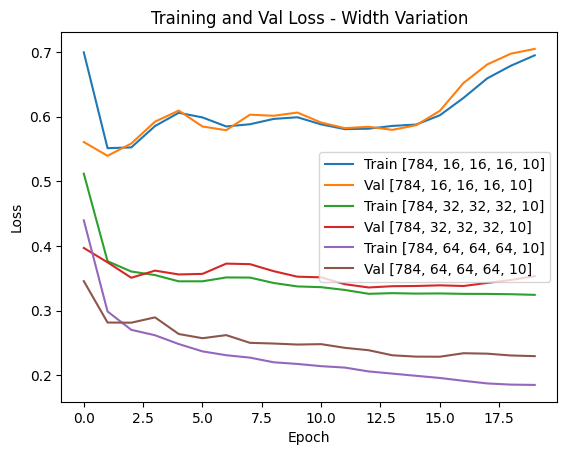

In [11]:
# Training and Validation Loss Plot
for config, (train_loss, val_loss) in history_width.items():
    plt.plot(train_loss, label=f"Train {config}")
    plt.plot(val_loss, label=f"Val {config}")
plt.legend()
plt.title("Training and Val Loss - Width Variation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

#### Depth Variation

In [ ]:
depth_variations = [
    [784, 64, 64, 64, 10], # depth = 3, width = 64
    [784, 64, 64, 64, 64, 10], # depth = 4, width = 64
    [784, 64, 64, 64, 64, 64, 10],  # depth = 5, width = 64
]

history_depth =  {}
cnt = 0
for config in depth_variations:
    ffnn = FFNN(layer_sizes=config, activations=["tanh"]*(len(config) - 2)+["softmax"], seed=42, weight_init="uniform", use_rmsnorm=False)
    training_loss, val_loss = ffnn.train(X_train, y_train, X_val, y_val, loss_function="categorical_cross_entropy", learning_rate=0.1, epochs=20, batch_size=64, verbose=0, regularization=None, reg_lambda=0)
    history_depth[str(config)] = (training_loss, val_loss)
    proba = ffnn.predict(X_val)
    preds = np.argmax(proba, axis=1)
    
    # accuracy score
    acc = accuracy_score(y_val, preds)
    # log loss
    final_log_loss = log_loss(y_val, proba)
    # confusion matrix
    confm = confusion_matrix(y_val, preds)
     # classification report
    claf = classification_report(y_val, preds, zero_division=0)
    
    print("==================================")
    print(f"Variation-{cnt + 1} -> {config}")
    print(f"Accuracy: {acc}")
    print(f"Final Log Loss: {final_log_loss}")
    print("Classification Report:")
    print(claf)
    print("Confusion Matrix:")
    print(confm)
    cnt += 1
    

Variation-1 -> [784, 64, 64, 64, 10]
Accuracy: 0.9327142857142857
Final Log Loss: 0.2294476127217782
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1343
           1       0.97      0.98      0.97      1600
           2       0.93      0.93      0.93      1380
           3       0.90      0.92      0.91      1433
           4       0.93      0.93      0.93      1295
           5       0.94      0.88      0.91      1273
           6       0.93      0.97      0.95      1396
           7       0.95      0.94      0.95      1503
           8       0.92      0.90      0.91      1357
           9       0.90      0.92      0.91      1420

    accuracy                           0.93     14000
   macro avg       0.93      0.93      0.93     14000
weighted avg       0.93      0.93      0.93     14000

Confusion Matrix:
[[1297    1    8    4    3    7   17    1    3    2]
 [   0 1561    8    8    1    2    1    4   10

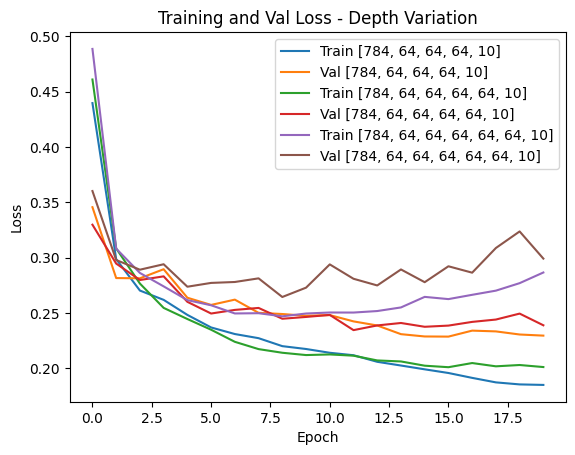

In [13]:
# Training and Validation Loss Plot
for config, (train_loss, val_loss) in history_depth.items():
    plt.plot(train_loss, label=f"Train {config}")
    plt.plot(val_loss, label=f"Val {config}")
plt.legend()
plt.title("Training and Val Loss - Depth Variation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### B. Effect of Activation Function on Hidden Layers

In this section, we explore the impact of the activation function used in the hidden layers on the FFNN’s performance. We experiment with six different activation functions:
- Linear
- ReLU (Rectified Linear Unit)
- Sigmoid
- Tanh (Hyperbolic Tangent)
- Swish
- ELU

In [14]:
activation_func_variations = ["linear", "relu", "sigmoid", "tanh", "swish", "elu"]

history_activation = {}
activation_models = {}

cnt = 0
for act in activation_func_variations:
    ffnn = FFNN(layer_sizes=[784, 64, 64, 64, 10], activations=[act]*3+["softmax"], seed=42)
    training_loss, val_loss = ffnn.train(X_train, y_train, X_val, y_val, loss_function="categorical_cross_entropy", learning_rate=0.1, epochs=20, batch_size=64, verbose=0)
    history_activation[act] = (training_loss, val_loss)
    activation_models[act] = ffnn
    proba = ffnn.predict(X_val)
    preds = np.argmax(proba, axis=1)
    
    # accuracy score
    acc = accuracy_score(y_val, preds)
    # log loss
    final_log_loss = log_loss(y_val, proba)
    # confusion matrix
    confm = confusion_matrix(y_val, preds)
    # classification report
    claf = classification_report(y_val, preds, zero_division=0)
    print("==================================")
    print(f"Variation-{cnt + 1} -> Activation Function: {act}")
    print(f"Accuracy: {acc}")
    print(f"Final Log Loss: {final_log_loss}")
    print("Classification Report:")
    print(claf)
    print("Confusion Matrix:")
    print(confm)
    cnt += 1

Variation-1 -> Activation Function: linear
Accuracy: 0.10142857142857142
Final Log Loss: 32.387797116792406
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1343
           1       0.00      0.00      0.00      1600
           2       0.00      0.00      0.00      1380
           3       0.00      0.00      0.00      1433
           4       0.00      0.00      0.00      1295
           5       0.00      0.00      0.00      1273
           6       0.00      0.00      0.00      1396
           7       0.00      0.00      0.00      1503
           8       0.00      0.00      0.00      1357
           9       0.10      1.00      0.18      1420

    accuracy                           0.10     14000
   macro avg       0.01      0.10      0.02     14000
weighted avg       0.01      0.10      0.02     14000

Confusion Matrix:
[[   0    0    0    0    0    0    0    0    0 1343]
 [   0    0    0    0    0    0    0   

d:\My Stuff\ITB Files\Semester VI\ML\tubes\FFNN-From-Scratch\src\actfunc.py:16: RuntimeWarning: overflow encountered in exp
  sig = 1 / (1 + np.exp(-x))


Variation-3 -> Activation Function: sigmoid
Accuracy: 0.85
Final Log Loss: 0.5213368843121589
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1343
           1       0.96      0.93      0.94      1600
           2       0.90      0.80      0.85      1380
           3       0.89      0.82      0.85      1433
           4       0.87      0.76      0.81      1295
           5       0.83      0.66      0.74      1273
           6       0.85      0.91      0.88      1396
           7       0.92      0.89      0.90      1503
           8       0.72      0.89      0.79      1357
           9       0.74      0.87      0.80      1420

    accuracy                           0.85     14000
   macro avg       0.85      0.85      0.85     14000
weighted avg       0.86      0.85      0.85     14000

Confusion Matrix:
[[1253    0    7    2    2   36   15    5   20    3]
 [   1 1483    9   12    1    2    1   11   77    3]


d:\My Stuff\ITB Files\Semester VI\ML\tubes\FFNN-From-Scratch\src\actfunc.py:41: RuntimeWarning: overflow encountered in exp
  sig = 1 / (1 + np.exp(-x))


Variation-5 -> Activation Function: swish
Accuracy: 0.11428571428571428
Final Log Loss: 31.924378716075186
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1343
           1       0.11      1.00      0.21      1600
           2       0.00      0.00      0.00      1380
           3       0.00      0.00      0.00      1433
           4       0.00      0.00      0.00      1295
           5       0.00      0.00      0.00      1273
           6       0.00      0.00      0.00      1396
           7       0.00      0.00      0.00      1503
           8       0.00      0.00      0.00      1357
           9       0.00      0.00      0.00      1420

    accuracy                           0.11     14000
   macro avg       0.01      0.10      0.02     14000
weighted avg       0.01      0.11      0.02     14000

Confusion Matrix:
[[   0 1343    0    0    0    0    0    0    0    0]
 [   0 1600    0    0    0    0    0    

d:\My Stuff\ITB Files\Semester VI\ML\tubes\FFNN-From-Scratch\src\actfunc.py:51: RuntimeWarning: overflow encountered in exp
  return np.where(x >= 0, x, alpha * (np.exp(x) - 1))
d:\My Stuff\ITB Files\Semester VI\ML\tubes\FFNN-From-Scratch\src\actfunc.py:49: RuntimeWarning: overflow encountered in exp
  turunan = np.where(x >= 0, 1, alpha * np.exp(x))


Variation-6 -> Activation Function: elu
Accuracy: 0.09971428571428571
Final Log Loss: 32.44958623688804
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1343
           1       0.00      0.00      0.00      1600
           2       0.00      0.00      0.00      1380
           3       0.00      0.00      0.00      1433
           4       0.00      0.00      0.00      1295
           5       0.00      0.00      0.00      1273
           6       0.10      1.00      0.18      1396
           7       0.00      0.00      0.00      1503
           8       0.00      0.00      0.00      1357
           9       0.00      0.00      0.00      1420

    accuracy                           0.10     14000
   macro avg       0.01      0.10      0.02     14000
weighted avg       0.01      0.10      0.02     14000

Confusion Matrix:
[[   0    0    0    0    0    0 1343    0    0    0]
 [   0    0    0    0    0    0 1600    0  

Variation: linear


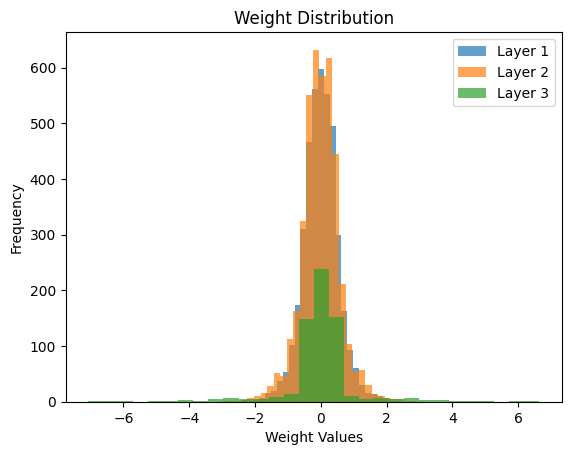

Variation: relu


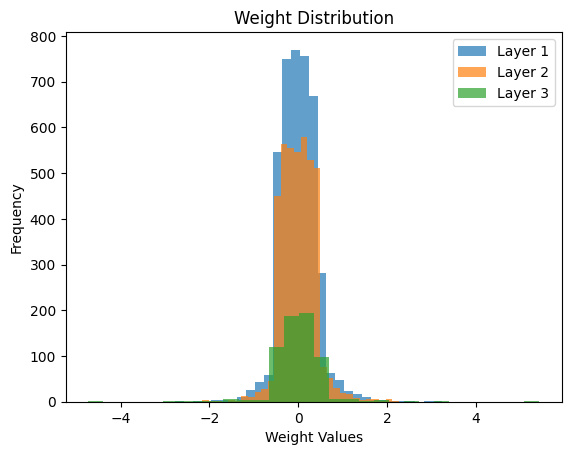

Variation: sigmoid


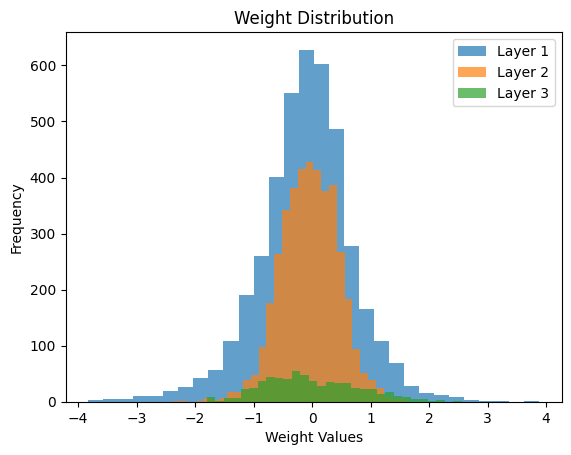

Variation: tanh


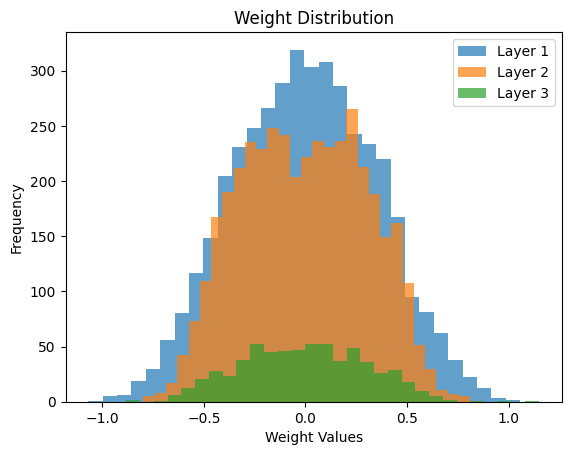

Variation: swish


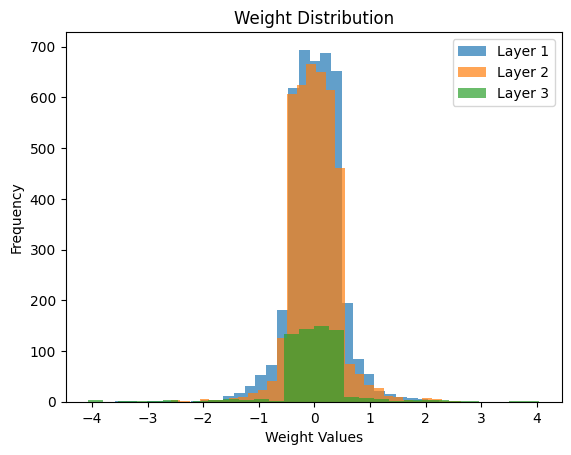

Variation: elu


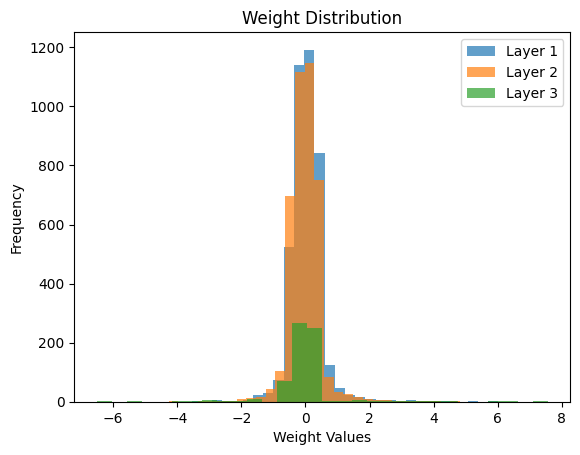

In [15]:
# Weight Distribution Plot
for config, model in activation_models.items():
    print(f"Variation: {config}")
    model.plot_weight_distribution([1, 2, 3])

Variation: linear


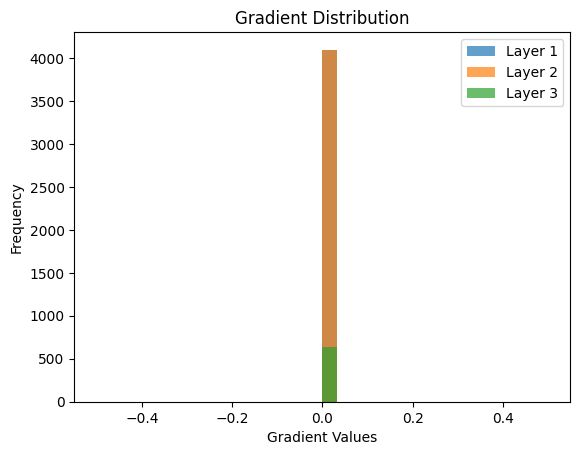

Variation: relu


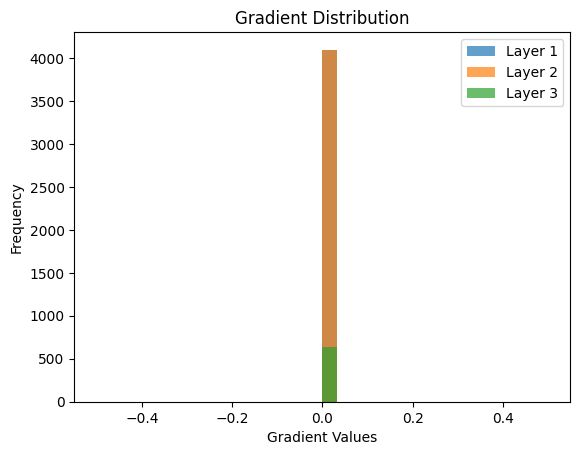

Variation: sigmoid


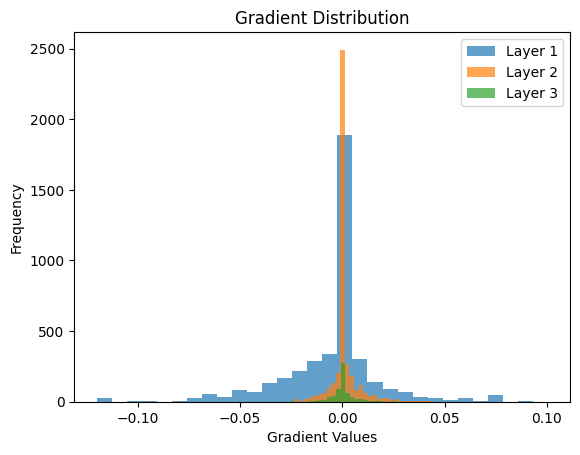

Variation: tanh


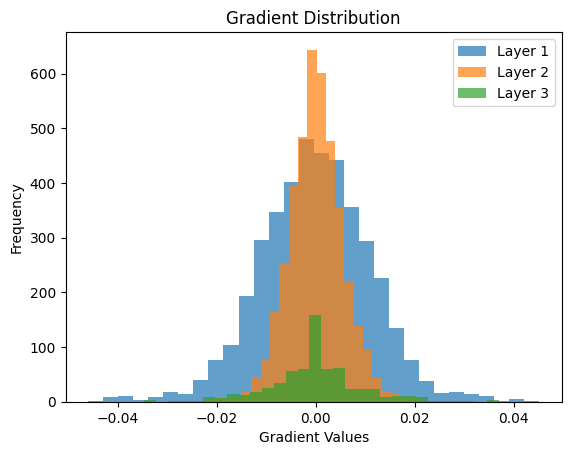

Variation: swish


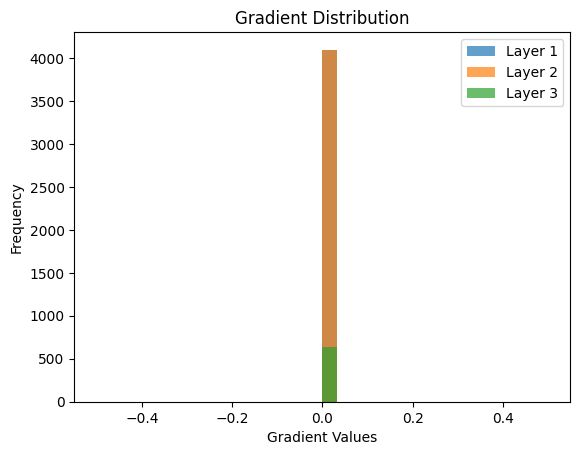

Variation: elu


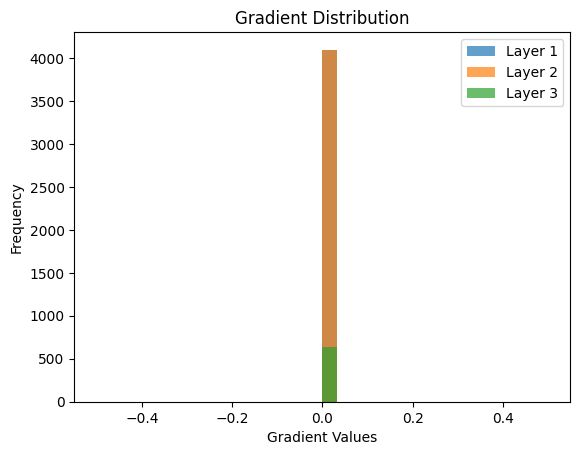

In [ ]:
# Gradient Distribution Plot
for config, model in activation_models.items():
    print(f"Variation: {config}")
    model.plot_gradient_distribution([1, 2, 3])

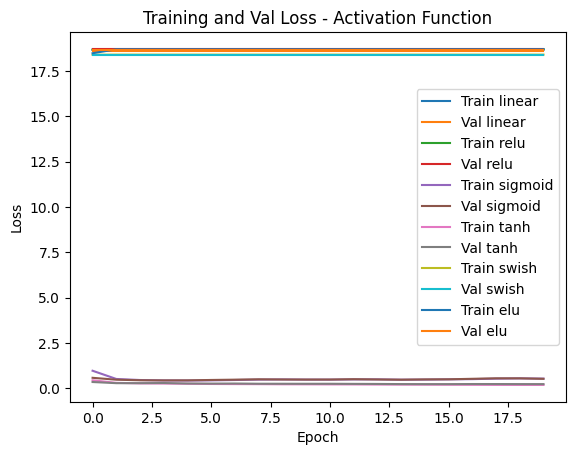

In [16]:
# Training and Validation Loss Plot
for config, (train_loss, val_loss) in history_activation.items():
    plt.plot(train_loss, label=f"Train {config}")
    plt.plot(val_loss, label=f"Val {config}")
plt.legend()
plt.title("Training and Val Loss - Activation Function")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### C. Effect of Learning Rate

In this section, we explore the impact of learning rate on the FFNN's overall performance. We experiment with three different learning rates:
- 0.001
- 0.01
- 0.1

In [17]:
learning_rate_variations = [0.001, 0.01, 0.1]

history_learning_rate = {}
learning_rate_models = {}

cnt = 0
for learning_rate in learning_rate_variations:
    ffnn = FFNN(layer_sizes=[784, 64, 64, 64, 10], activations=["tanh"]*3+["softmax"], seed=42)
    training_loss, val_loss = ffnn.train(X_train, y_train, X_val, y_val, loss_function="categorical_cross_entropy", learning_rate=learning_rate, epochs=20, batch_size=64, verbose=0)
    history_learning_rate[learning_rate] = (training_loss, val_loss)
    learning_rate_models[learning_rate] = ffnn
    proba = ffnn.predict(X_val)
    preds = np.argmax(proba, axis=1)
    
    # accuracy score
    acc = accuracy_score(y_val, preds)
    # log loss
    final_log_loss = log_loss(y_val, proba)
    # confusion matrix
    confm = confusion_matrix(y_val, preds)
    # classification report
    claf = classification_report(y_val, preds, zero_division=0)
    print("==================================")
    print(f"Variation-{cnt + 1} -> Learning Rate: {learning_rate}")
    print(f"Accuracy: {acc}")
    print(f"Final Log Loss: {final_log_loss}")
    print("Classification Report:")
    print(claf)
    print("Confusion Matrix:")
    print(confm)
    cnt += 1

Variation-1 -> Learning Rate: 0.001
Accuracy: 0.8973571428571429
Final Log Loss: 0.35092456374008557
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1343
           1       0.94      0.96      0.95      1600
           2       0.90      0.86      0.88      1380
           3       0.88      0.87      0.87      1433
           4       0.88      0.90      0.89      1295
           5       0.86      0.83      0.84      1273
           6       0.92      0.93      0.92      1396
           7       0.92      0.92      0.92      1503
           8       0.85      0.87      0.86      1357
           9       0.87      0.86      0.86      1420

    accuracy                           0.90     14000
   macro avg       0.90      0.90      0.90     14000
weighted avg       0.90      0.90      0.90     14000

Confusion Matrix:
[[1289    0    4    1    2   10   16    5   12    4]
 [   0 1543    5   15    2    9    0    5   17

Variation: 0.001


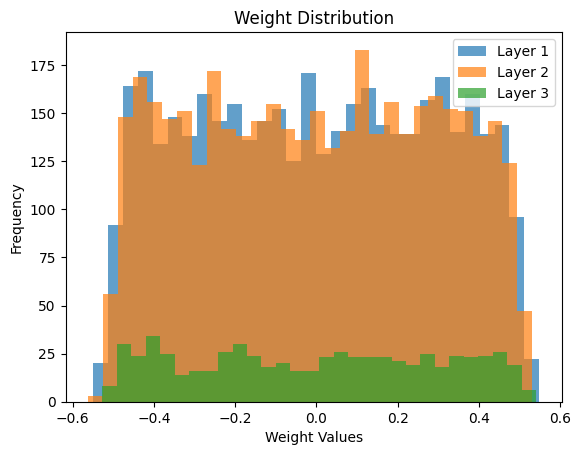

Variation: 0.01


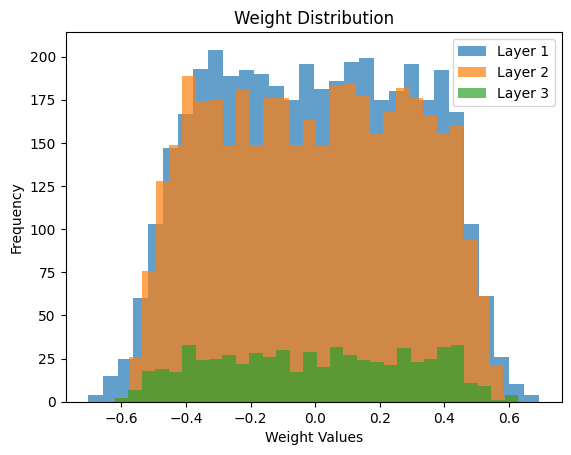

Variation: 0.1


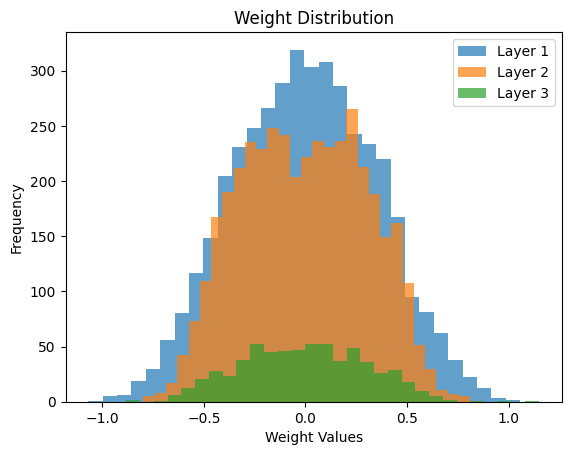

In [18]:
# Weight Distribution Plot
for config, model in learning_rate_models.items():
    print(f"Variation: {config}")
    model.plot_weight_distribution([1, 2, 3])

Variation: 0.001


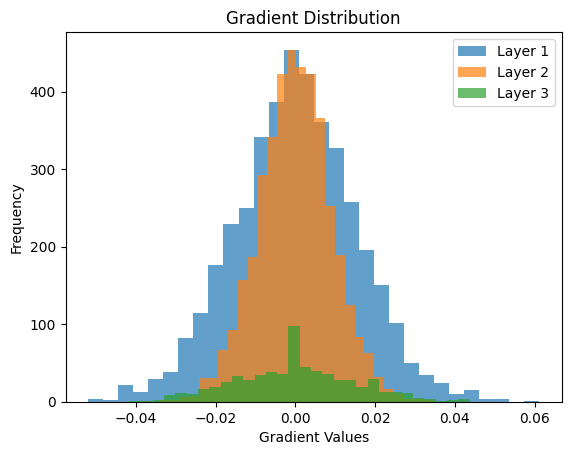

Variation: 0.01


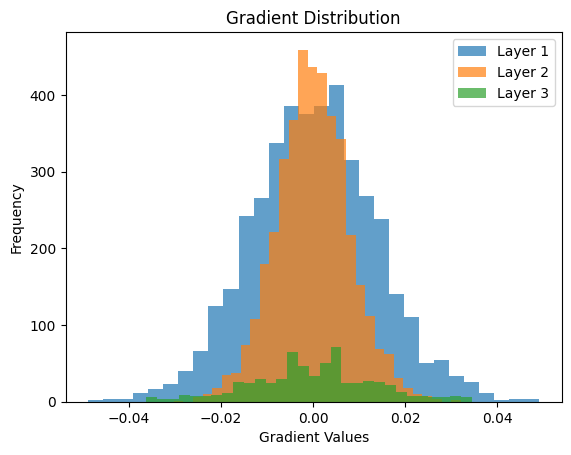

Variation: 0.1


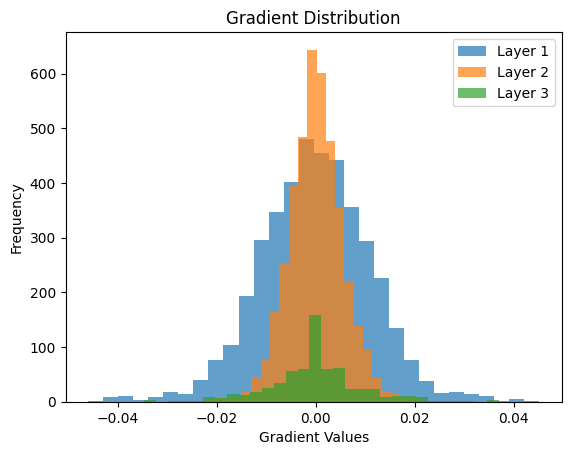

In [19]:
# Gradient Distribution Plot
for config, model in learning_rate_models.items():
    print(f"Variation: {config}")
    model.plot_gradient_distribution([1, 2, 3])

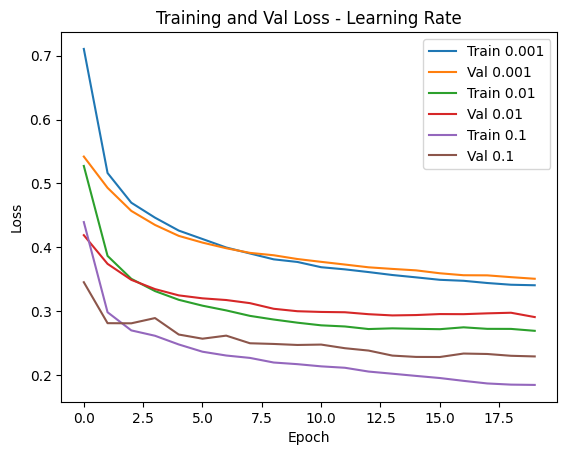

In [20]:
# Training and Validation Loss Plot
for config, (train_loss, val_loss) in history_learning_rate.items():
    plt.plot(train_loss, label=f"Train {config}")
    plt.plot(val_loss, label=f"Val {config}")
plt.legend()
plt.title("Training and Val Loss - Learning Rate")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### D. Effect of Weight Initialization

In this section, we explore the impact of weight initialization on the FFNN's overall performance. We experiment with three different learning rates:
- Zero Initialization
- Uniform Distribution
- Normal Distribution

In [21]:
weight_init_variations = ["zero", "uniform", "normal", "he", "xavier"]

history_weight_init = {}
weight_init_models = {}

cnt = 0
for weight_init in weight_init_variations:
    ffnn = FFNN(layer_sizes=[784, 64, 64, 64, 10], activations=["tanh"]*3+["softmax"], seed=42, weight_init=weight_init, use_rmsnorm=True)
    training_loss, val_loss = ffnn.train(X_train, y_train, X_val, y_val, loss_function="categorical_cross_entropy", learning_rate=0.1, epochs=20, batch_size=64, verbose=0)
    history_weight_init[weight_init] = (training_loss, val_loss)
    weight_init_models[weight_init] = ffnn
    proba = ffnn.predict(X_val)
    preds = np.argmax(proba, axis=1)
    
    # accuracy score
    acc = accuracy_score(y_val, preds)
    # log loss
    final_log_loss = log_loss(y_val, proba)
    # confusion matrix
    confm = confusion_matrix(y_val, preds)
    # classification report
    claf = classification_report(y_val, preds, zero_division=0)
    print("==================================")
    print(f"Variation-{cnt + 1} -> Weight Init: {weight_init}")
    print(f"Accuracy: {acc}")
    print(f"Final Log Loss: {final_log_loss}")
    print("Classification Report:")
    print(claf)
    print("Confusion Matrix:")
    print(confm)
    cnt += 1

Variation-1 -> Weight Init: zero
Accuracy: 0.11428571428571428
Final Log Loss: 2.30093401528089
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1343
           1       0.11      1.00      0.21      1600
           2       0.00      0.00      0.00      1380
           3       0.00      0.00      0.00      1433
           4       0.00      0.00      0.00      1295
           5       0.00      0.00      0.00      1273
           6       0.00      0.00      0.00      1396
           7       0.00      0.00      0.00      1503
           8       0.00      0.00      0.00      1357
           9       0.00      0.00      0.00      1420

    accuracy                           0.11     14000
   macro avg       0.01      0.10      0.02     14000
weighted avg       0.01      0.11      0.02     14000

Confusion Matrix:
[[   0 1343    0    0    0    0    0    0    0    0]
 [   0 1600    0    0    0    0    0    0    0    0

Variation: zero


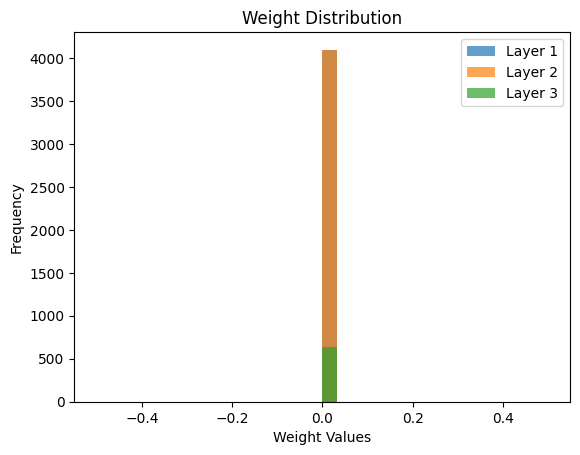

Variation: uniform


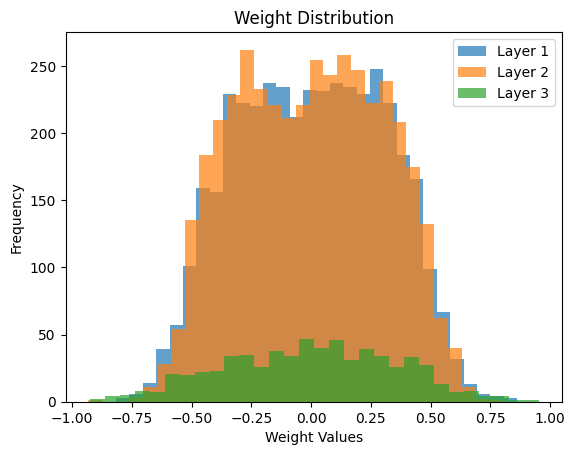

Variation: normal


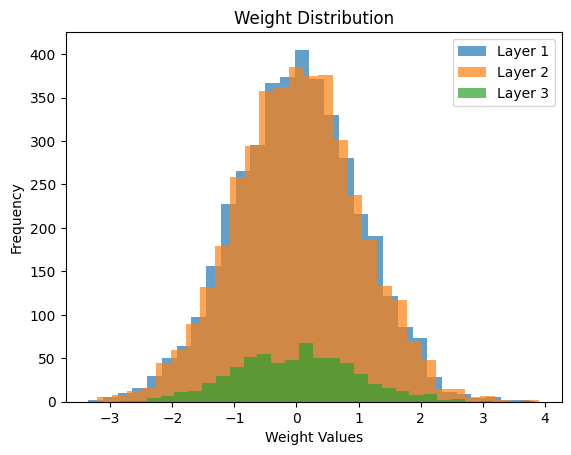

Variation: he


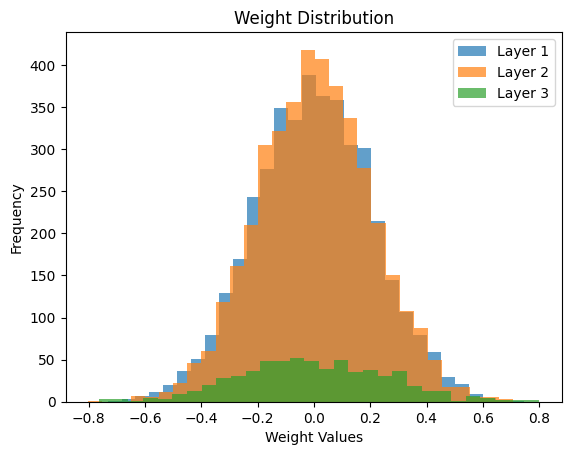

Variation: xavier


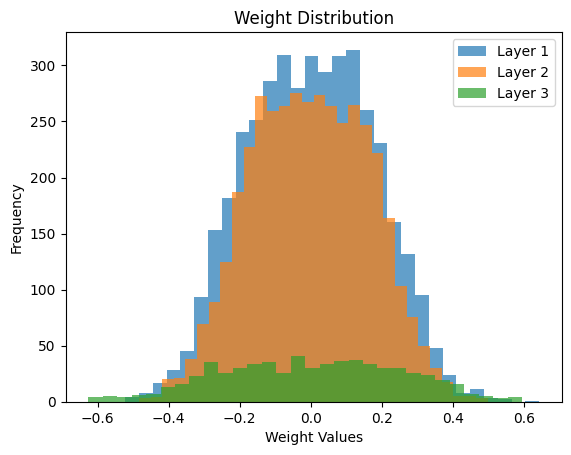

In [22]:
# Weight Distribution Plot
for config, model in weight_init_models.items():
    print(f"Variation: {config}")
    model.plot_weight_distribution([1, 2, 3])

Variation: zero


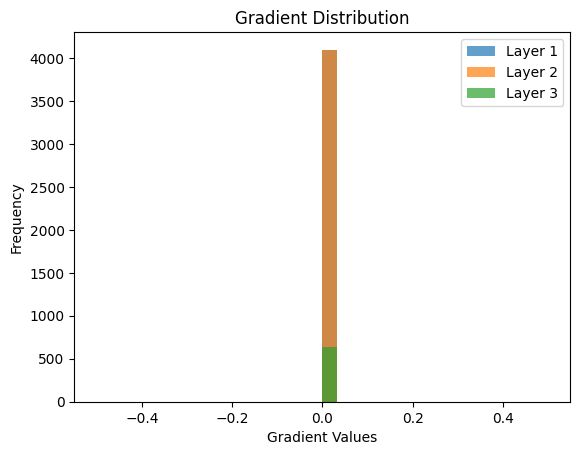

Variation: uniform


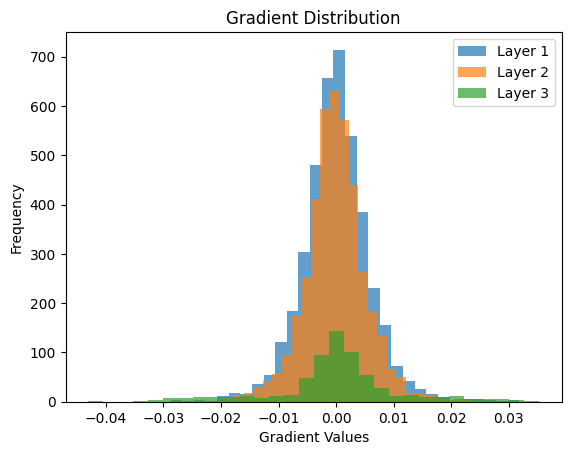

Variation: normal


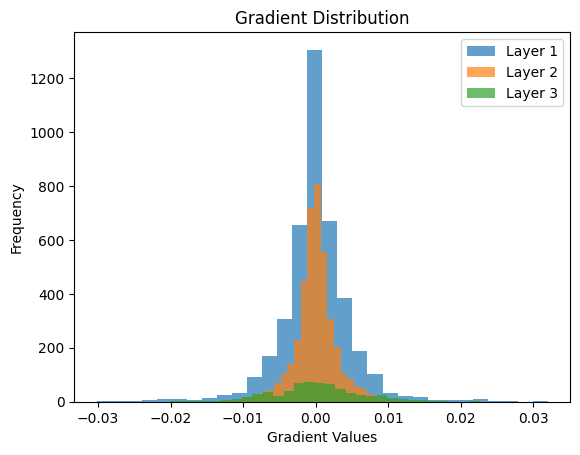

Variation: he


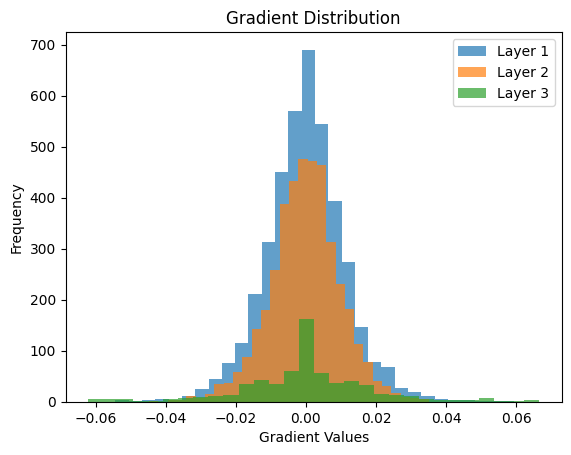

Variation: xavier


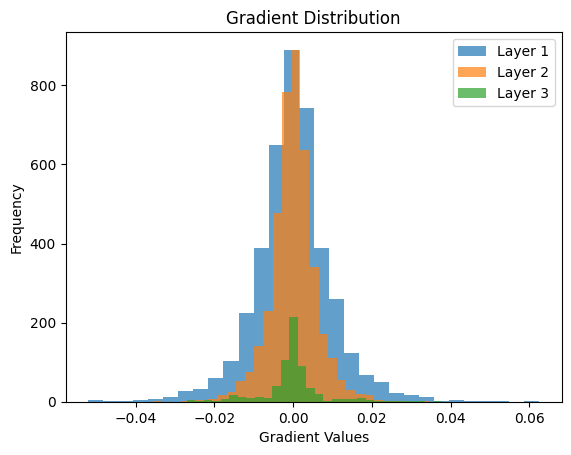

In [23]:
# Gradient Distribution Plot
for config, model in weight_init_models.items():
    print(f"Variation: {config}")
    model.plot_gradient_distribution([1, 2, 3])

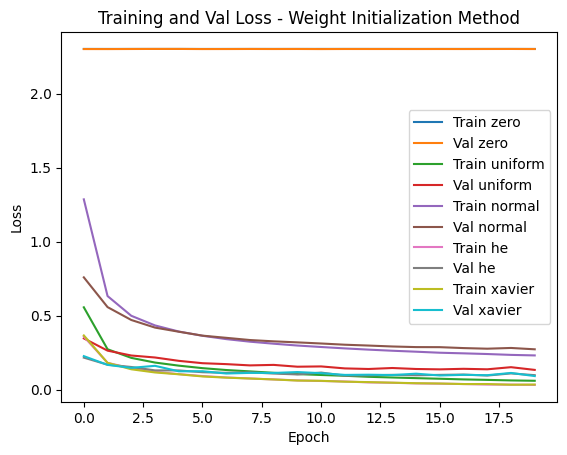

In [24]:
# Training and Validation Loss Plot
for config, (train_loss, val_loss) in history_weight_init.items():
    plt.plot(train_loss, label=f"Train {config}")
    plt.plot(val_loss, label=f"Val {config}")
plt.legend()
plt.title("Training and Val Loss - Weight Initialization Method")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### E. Effect of Root Mean Square (RMS) Normalization

In this section, we explore the impact of RMS normalization on the FFNN's performance. We experiment with RMS normalization and no RMS normalization. 

In [25]:
rms_variations = [True, False]

history_rms = {}
rms_models = {}

cnt = 0
for act in rms_variations:
    ffnn = FFNN(layer_sizes=[784, 64, 64, 64, 10], activations=["tanh"]*3+["softmax"], seed=42, weight_init="xavier", use_rmsnorm=act)
    training_loss, val_loss = ffnn.train(X_train, y_train, X_val, y_val, loss_function="categorical_cross_entropy", learning_rate=0.1, epochs=20, batch_size=64, verbose=0)
    history_rms[str(act)] = (training_loss, val_loss)
    rms_models[str(act)] = ffnn
    proba = ffnn.predict(X_val)
    preds = np.argmax(proba, axis=1)
    
    # accuracy score
    acc = accuracy_score(y_val, preds)
    # log loss
    final_log_loss = log_loss(y_val, proba)
    # confusion matrix
    confm = confusion_matrix(y_val, preds)
    # classification report
    claf = classification_report(y_val, preds, zero_division=0)
    print("==================================")
    print(f"Variation-{cnt + 1} -> RMSnorm: {act}")
    print(f"Accuracy: {acc}")
    print(f"Final Log Loss: {final_log_loss}")
    print("Classification Report:")
    print(claf)
    print("Confusion Matrix:")
    print(confm)
    cnt += 1

Variation-1 -> RMSnorm: True
Accuracy: 0.9741428571428571
Final Log Loss: 0.09142976457045245
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.99      0.99      0.99      1600
           2       0.97      0.96      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.98      0.98      0.98      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.98      0.97      1503
           8       0.96      0.96      0.96      1357
           9       0.97      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

Confusion Matrix:
[[1315    1    5    0    1    4    4    3    6    4]
 [   0 1586    1    3    2    0    0    5    2    1]


Variation: RMSnorm True


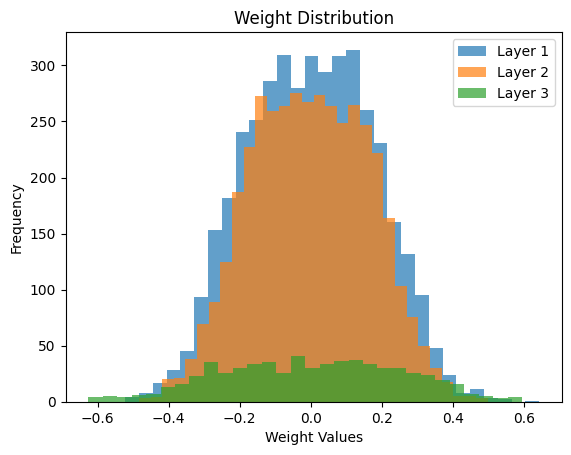

Variation: RMSnorm False


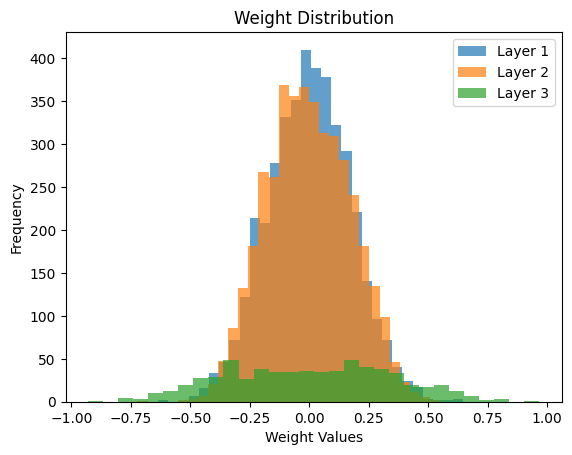

In [26]:
# Weight Distribution Plot
for config, model in rms_models.items():
    print(f"Variation: RMSnorm {config}")
    model.plot_weight_distribution([1, 2, 3])

Variation: RMSnorm True


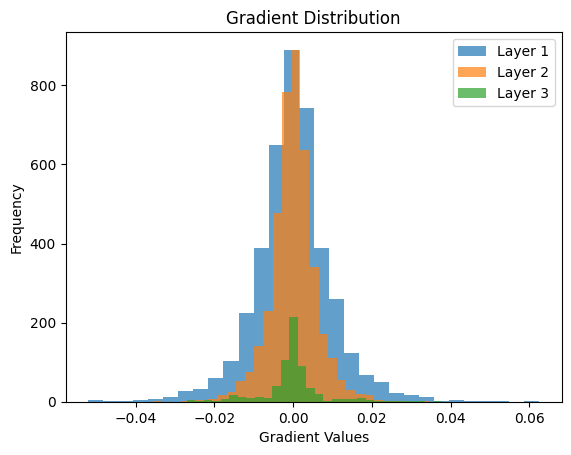

Variation: RMSnorm False


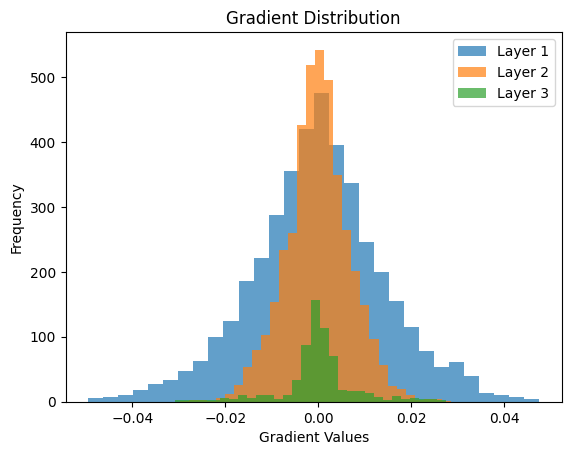

In [27]:
# Gradient Distribution Plot
for config, model in rms_models.items():
    print(f"Variation: RMSnorm {config}")
    model.plot_gradient_distribution([1, 2, 3])

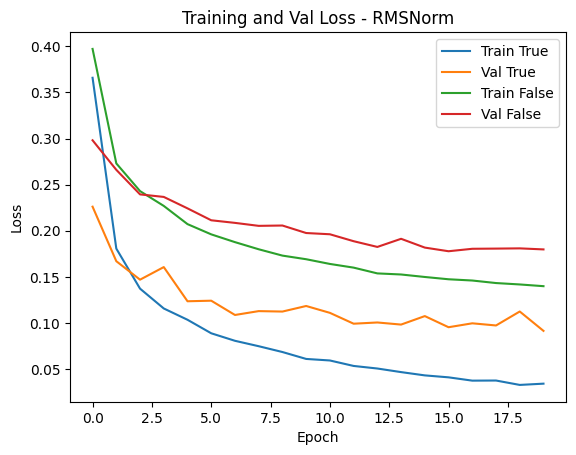

In [28]:
# Training and Validation Loss Plot
for config, (train_loss, val_loss) in history_rms.items():
    plt.plot(train_loss, label=f"Train {config}")
    plt.plot(val_loss, label=f"Val {config}")
plt.legend()
plt.title("Training and Val Loss - RMSNorm")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### E. Effect of L1 and L2 Regularization

In this section, we explore the impact of L1 and L2 Regularization on the FFNN's performance. We experiment with three different combinations:
- No Regularization
- L1 Regularization
- L2 Regularization

In [29]:
reg_variations = [None, "l1", "l2"]

history_reg = {}
reg_models = {}

cnt = 0
for act in reg_variations:
    ffnn = FFNN(layer_sizes=[784, 64, 64, 64, 10], activations=["tanh"]*3+["softmax"], seed=42, weight_init="xavier", use_rmsnorm=True)
    training_loss, val_loss = ffnn.train(X_train, y_train, X_val, y_val, loss_function="categorical_cross_entropy", learning_rate=0.1, epochs=20, batch_size=64, verbose=0, regularization=act, reg_lambda=0.01)
    history_reg[str(act)] = (training_loss, val_loss)
    reg_models[str(act)] = ffnn
    proba = ffnn.predict(X_val)
    preds = np.argmax(proba, axis=1)
    
    # accuracy score
    acc = accuracy_score(y_val, preds)
    # log loss
    final_log_loss = log_loss(y_val, proba)
    # confusion matrix
    confm = confusion_matrix(y_val, preds)
    # classification report
    claf = classification_report(y_val, preds, zero_division=0)
    print("==================================")
    print(f"Variation-{cnt + 1} -> Regularization: {act}")
    print(f"Accuracy: {acc}")
    print(f"Final Log Loss: {final_log_loss}")
    print("Classification Report:")
    print(claf)
    print("Confusion Matrix:")
    print(confm)
    cnt += 1

Variation-1 -> Regularization: None
Accuracy: 0.9741428571428571
Final Log Loss: 0.09142976457045245
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.99      0.99      0.99      1600
           2       0.97      0.96      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.98      0.98      0.98      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.98      0.97      1503
           8       0.96      0.96      0.96      1357
           9       0.97      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

Confusion Matrix:
[[1315    1    5    0    1    4    4    3    6    4]
 [   0 1586    1    3    2    0    0    5    2

Variation: Regularization None


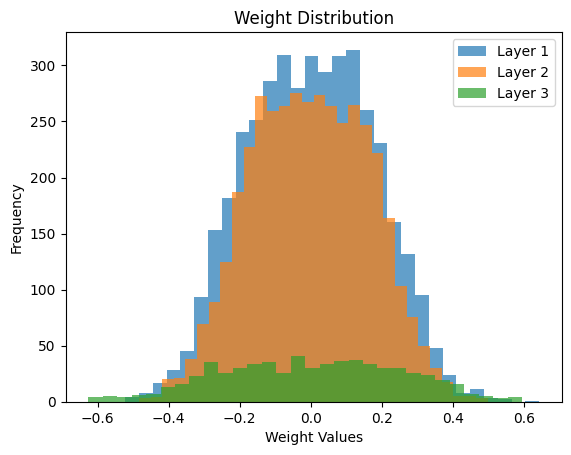

Variation: Regularization l1


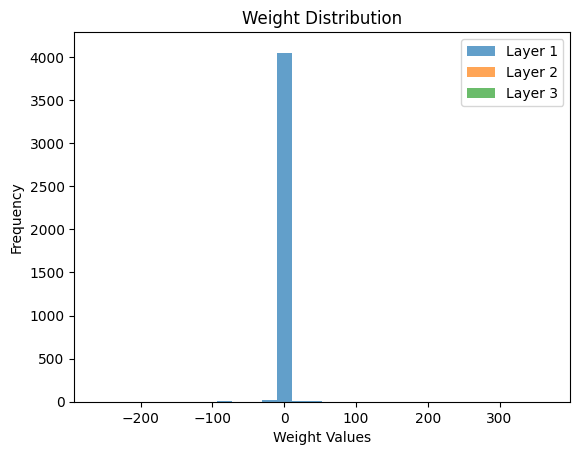

Variation: Regularization l2


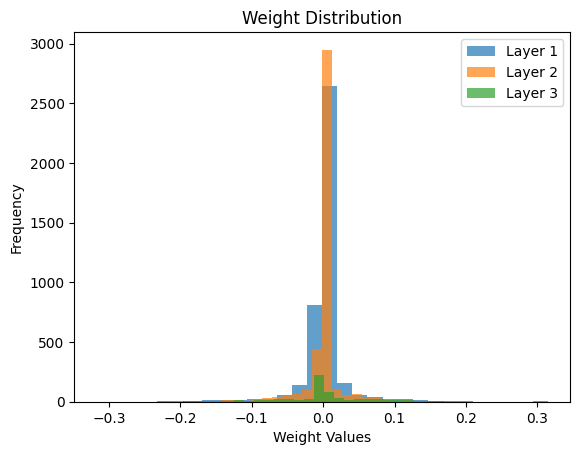

In [30]:
# Weight Distribution Plot
for config, model in reg_models.items():
    print(f"Variation: Regularization {config}")
    model.plot_weight_distribution([1, 2, 3])

Variation: Regularization None


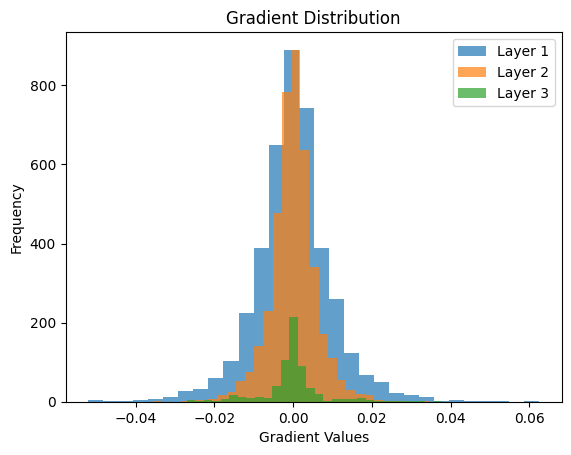

Variation: Regularization l1


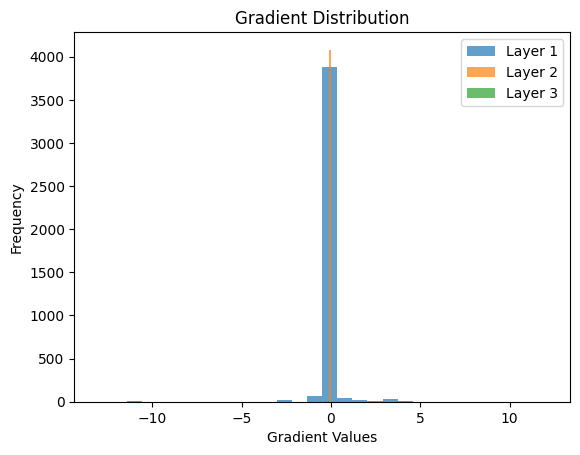

Variation: Regularization l2


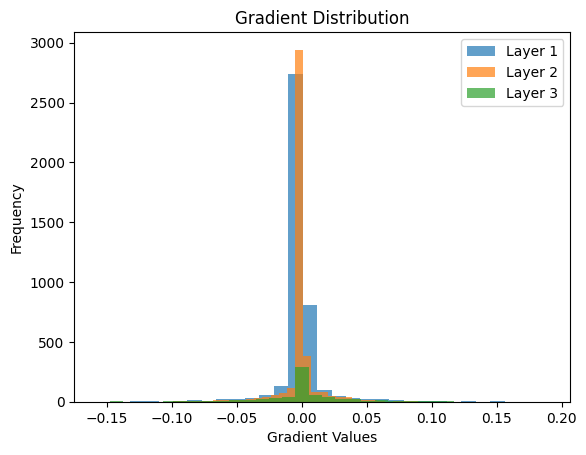

In [31]:
# Gradient Distribution Plot
for config, model in reg_models.items():
    print(f"Variation: Regularization {config}")
    model.plot_gradient_distribution([1, 2, 3])

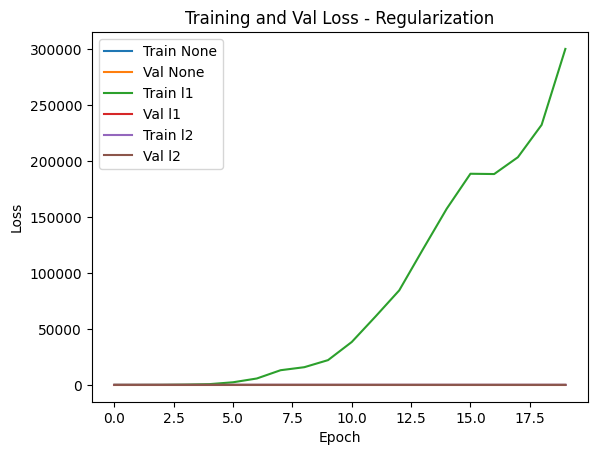

In [32]:
# Training and Validation Loss Plot
for config, (train_loss, val_loss) in history_reg.items():
    plt.plot(train_loss, label=f"Train {config}")
    plt.plot(val_loss, label=f"Val {config}")
plt.legend()
plt.title("Training and Val Loss - Regularization")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## 5. Comparison With MLPClassifier

In this part, we will compare the custom FFNN with sklearn MPLClassifier.

#### MLPClassifer
Parameters:
- hidden layer width = 64
- hidden layer depth = 3
- activation function = tanh
- learning rate = 0.01
- batch size = 64
- max iter = 20

Iteration 1, loss = 1.48138898
Iteration 2, loss = 1.40476421
Iteration 3, loss = 1.34100915
Iteration 4, loss = 1.27358759
Iteration 5, loss = 1.18230712
Iteration 6, loss = 1.31125287
Iteration 7, loss = 1.23875456
Iteration 8, loss = 1.02095580
Iteration 9, loss = 1.11424269
Iteration 10, loss = 1.25047249
Iteration 11, loss = 1.10749360
Iteration 12, loss = 1.07047747
Iteration 13, loss = 1.08865356
Iteration 14, loss = 1.07406246
Iteration 15, loss = 1.08111284
Iteration 16, loss = 1.09320646
Iteration 17, loss = 1.08144364
Iteration 18, loss = 0.97756150
Iteration 19, loss = 0.98233147
Iteration 20, loss = 0.96152346
Accuracy: 0.655
Final Log Loss: 0.958897634199978


c:\Users\adril\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


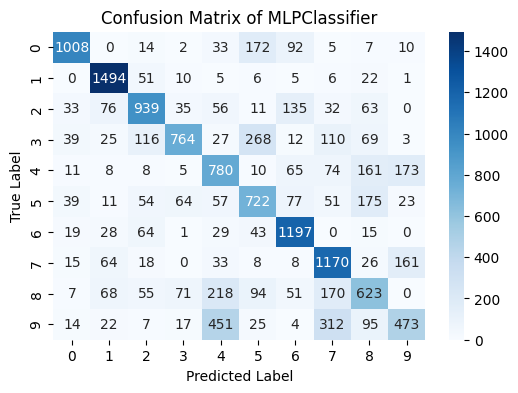

In [37]:
import seaborn as sns
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(64, 64, 64),
                    activation="tanh",
                    learning_rate_init=0.01,
                    learning_rate='constant',
                    max_iter=20,
                    solver="sgd",
                    batch_size=64,
                    verbose=True,
                    random_state=42)
mlp.fit(X_train, y_train)

proba_mlp = mlp.predict_proba(X_val)
pred_mlp = mlp.predict(X_val)

acc_mlp = accuracy_score(y_val, pred_mlp)
mlp_final_log_loss = log_loss(y_val, proba_mlp)
mlp_confm = confusion_matrix(y_val, pred_mlp)

print(f"Accuracy: {acc_mlp}")
print(f"Final Log Loss: {mlp_final_log_loss}")

plt.figure(figsize=(6, 4))
sns.heatmap(mlp_confm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_val), yticklabels=set(y_val))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of MLPClassifier")
plt.show()

#### Custom FFNN From Scratch
Parameters:
- hidden layer width = 64
- hidden layer depth = 3
- hidden layer activation function = tanh
- weight initialization = xavier
- rms normalization = true
- loss function = categorical_cross_entropy
- learning rate = 0.01
- batch size = 64
- epochs = 20

Epoch 1/20: 100%|██████████| 875/875 [00:01<00:00, 445.95batch/s]


Epoch 1/20 - Training Loss: 0.6586 - Validation Loss: 0.4149


Epoch 2/20: 100%|██████████| 875/875 [00:02<00:00, 425.46batch/s]


Epoch 2/20 - Training Loss: 0.3302 - Validation Loss: 0.2980


Epoch 3/20: 100%|██████████| 875/875 [00:02<00:00, 408.73batch/s]


Epoch 3/20 - Training Loss: 0.2434 - Validation Loss: 0.2292


Epoch 4/20: 100%|██████████| 875/875 [00:02<00:00, 414.18batch/s]


Epoch 4/20 - Training Loss: 0.1993 - Validation Loss: 0.2043


Epoch 5/20: 100%|██████████| 875/875 [00:02<00:00, 433.12batch/s]


Epoch 5/20 - Training Loss: 0.1717 - Validation Loss: 0.1791


Epoch 6/20: 100%|██████████| 875/875 [00:02<00:00, 400.35batch/s]


Epoch 6/20 - Training Loss: 0.1510 - Validation Loss: 0.1749


Epoch 7/20: 100%|██████████| 875/875 [00:02<00:00, 427.09batch/s]


Epoch 7/20 - Training Loss: 0.1361 - Validation Loss: 0.1648


Epoch 8/20: 100%|██████████| 875/875 [00:02<00:00, 407.92batch/s]


Epoch 8/20 - Training Loss: 0.1242 - Validation Loss: 0.1608


Epoch 9/20: 100%|██████████| 875/875 [00:02<00:00, 431.10batch/s]


Epoch 9/20 - Training Loss: 0.1146 - Validation Loss: 0.1605


Epoch 10/20: 100%|██████████| 875/875 [00:02<00:00, 404.45batch/s]


Epoch 10/20 - Training Loss: 0.1056 - Validation Loss: 0.1487


Epoch 11/20: 100%|██████████| 875/875 [00:02<00:00, 434.47batch/s]


Epoch 11/20 - Training Loss: 0.0988 - Validation Loss: 0.1365


Epoch 12/20: 100%|██████████| 875/875 [00:02<00:00, 401.43batch/s]


Epoch 12/20 - Training Loss: 0.0924 - Validation Loss: 0.1326


Epoch 13/20: 100%|██████████| 875/875 [00:01<00:00, 451.34batch/s]


Epoch 13/20 - Training Loss: 0.0867 - Validation Loss: 0.1239


Epoch 14/20: 100%|██████████| 875/875 [00:02<00:00, 431.38batch/s]


Epoch 14/20 - Training Loss: 0.0819 - Validation Loss: 0.1252


Epoch 15/20: 100%|██████████| 875/875 [00:02<00:00, 424.90batch/s]


Epoch 15/20 - Training Loss: 0.0776 - Validation Loss: 0.1269


Epoch 16/20: 100%|██████████| 875/875 [00:02<00:00, 425.35batch/s]


Epoch 16/20 - Training Loss: 0.0732 - Validation Loss: 0.1242


Epoch 17/20: 100%|██████████| 875/875 [00:02<00:00, 433.17batch/s]


Epoch 17/20 - Training Loss: 0.0693 - Validation Loss: 0.1252


Epoch 18/20: 100%|██████████| 875/875 [00:02<00:00, 422.09batch/s]


Epoch 18/20 - Training Loss: 0.0660 - Validation Loss: 0.1167


Epoch 19/20: 100%|██████████| 875/875 [00:01<00:00, 446.64batch/s]


Epoch 19/20 - Training Loss: 0.0620 - Validation Loss: 0.1202


Epoch 20/20: 100%|██████████| 875/875 [00:02<00:00, 420.76batch/s]


Epoch 20/20 - Training Loss: 0.0599 - Validation Loss: 0.1121
Accuracy: 0.9672857142857143
Final Log Loss: 0.11209042437821581
Confusion Matrix:
[[1314    1    4    1    0    4    7    2    8    2]
 [   0 1579    4    1    2    2    0    4    5    3]
 [   4    5 1342    6    1    2    5    6    7    2]
 [   0    0   18 1365    2   21    1   11    8    7]
 [   2    1    7    0 1243    1    7    3    5   26]
 [   2    4    0   14    2 1233    8    2    7    1]
 [   6    1    4    0    4    7 1366    2    5    1]
 [   3    8   17    1    2    2    0 1455    3   12]
 [   3    8   11   16    1   11    5    6 1294    2]
 [   9    6    2    8   18    4    0   11   11 1351]]


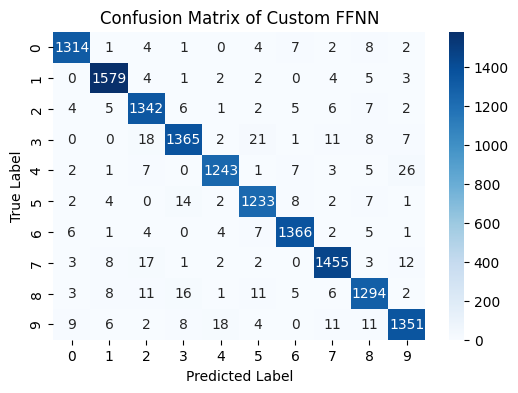

In [38]:
ffnn_model = FFNN(layer_sizes=[784, 64, 64, 64, 10], activations=["tanh"]*3+["softmax"], seed=42, weight_init="xavier", use_rmsnorm=True)
ffnn_training_loss, ffnn_val_loss = ffnn_model.train(X_train, y_train, X_val, y_val, loss_function="categorical_cross_entropy", learning_rate=0.01, epochs=20, batch_size=64, verbose=1)
ffnn_proba = ffnn_model.predict(X_val)
ffnn_preds = np.argmax(ffnn_proba, axis=1)

ffnn_acc = accuracy_score(y_val, ffnn_preds)
ffnn_final_log_loss = log_loss(y_val, ffnn_proba)
ffnn_confm = confusion_matrix(y_val, ffnn_preds)

print(f"Accuracy: {ffnn_acc}")
print(f"Final Log Loss: {ffnn_final_log_loss}")
print("Confusion Matrix:")
print(ffnn_confm)

plt.figure(figsize=(6, 4))
sns.heatmap(ffnn_confm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_val), yticklabels=set(y_val))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Custom FFNN")
plt.show()